In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_prices_100.csv')
df

,Area,Bedrooms,Age,Price
0,3619,1,0,551862
1,2003,2,4,309008
2,3771,5,2,622599
3,2728,1,0,412270
4,1895,2,16,294776
...,...,...,...,...
95,4805,1,0,735767
96,3544,5,3,570400
97,3202,2,16,479790
98,1542,3,28,219954


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Area      100 non-null    int64
 1   Bedrooms  100 non-null    int64
 2   Age       100 non-null    int64
 3   Price     100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [4]:
df.isnull().sum()
df.dropna().sum()
df.dropna()

,Area,Bedrooms,Age,Price
0,3619,1,0,551862
1,2003,2,4,309008
2,3771,5,2,622599
3,2728,1,0,412270
4,1895,2,16,294776
...,...,...,...,...
95,4805,1,0,735767
96,3544,5,3,570400
97,3202,2,16,479790
98,1542,3,28,219954


In [5]:
## Correlation Analysis
matrix = df.corr()
matrix.head()

,Area,Bedrooms,Age,Price
Area,1.000000,-0.016210,-0.117507,0.994412
Bedrooms,-0.016210,1.000000,-0.054489,0.065853
Age,-0.117507,-0.054489,1.000000,-0.180018
Price,0.994412,0.065853,-0.180018,1.000000


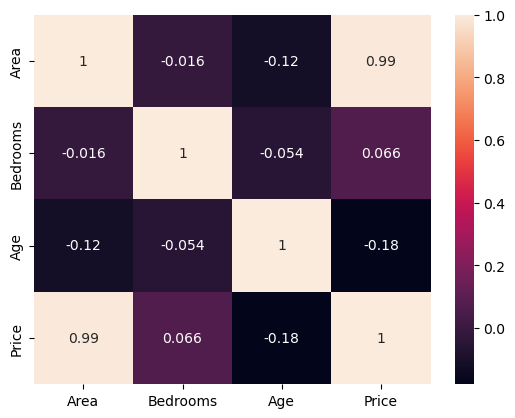

In [6]:
# Visualization
sns.heatmap(matrix,annot=True)
plt.show()

In [7]:
y = df["Price"]
x = df.drop("Price",axis=1)

In [8]:
# Training and Testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,
    random_state=42
)

In [9]:
# Algorithm
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
model.score(x_test,y_test)

0.9992057470208766

In [11]:
model.score(x_train,y_train)

0.9990223671132484

In [12]:
y_pred = model.predict(x_test)
y_pred

array([733292.69190026, 774955.12633986, 199271.74203105, 244942.68221802,
       692778.39842672, 611499.83413879, 276166.07993622, 342366.70629852,
       209662.91282872, 554242.8629385 , 396760.35881555, 482842.71939925,
       420431.12088698, 183849.66781448, 502726.79128257, 285655.79278946,
       672208.49771025, 274176.56756903, 627897.63109092, 448209.6270461 ])

In [13]:
df2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2.head()

,Actual,Predicted
83,741216,733292.691900
53,774385,774955.126340
70,200718,199271.742031
45,240393,244942.682218
44,690767,692778.398427


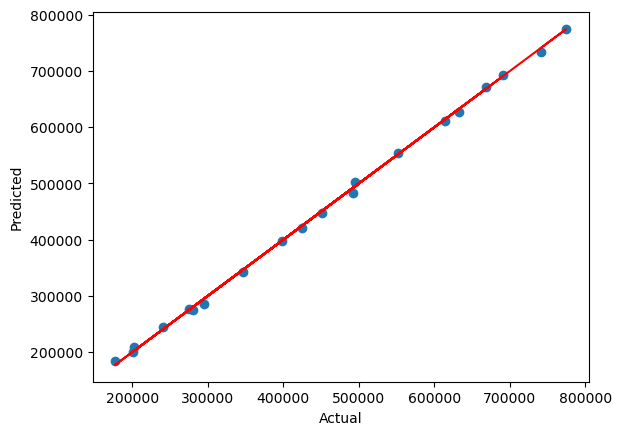

In [14]:
# ploting a graph

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot(y_test,y_test,color="red")
plt.show()